In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key text.latex.preview in file C:\Users\Shamik Shetty\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Shamik Shetty\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Shamik Shetty\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [2]:
df_customer = pd.read_csv("Customers.csv")
df_customer.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [3]:
df_customer=df_customer.iloc[:,[0,1,2,3,7,5,6,4]]

In [4]:
df_customer.head()

,CustomerID,Gender,Age,Annual Income ($),Family Size,Profession,Work Experience,Spending Score (1-100)
0,1,Male,19,15000,4,Healthcare,1,39
1,2,Male,21,35000,3,Engineer,3,81
2,3,Female,20,86000,1,Engineer,1,6
3,4,Female,23,59000,2,Lawyer,0,77
4,5,Female,31,38000,6,Entertainment,2,40


In [5]:
df_customer.shape

(2000, 8)

In [6]:
df_customer.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Family Size                int64
Profession                object
Work Experience            int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df_customer.describe()

,CustomerID,Age,Annual Income ($),Family Size,Work Experience,Spending Score (1-100)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,3.768500,4.102500,50.962500
std,577.494589,28.429747,45739.536688,1.970749,3.922204,27.934661
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,500.750000,25.000000,74572.000000,2.000000,1.000000,28.000000
50%,1000.500000,48.000000,110045.000000,4.000000,3.000000,50.000000
75%,1500.250000,73.000000,149092.750000,5.000000,7.000000,75.000000
max,2000.000000,99.000000,189974.000000,9.000000,17.000000,100.000000


In [8]:
df_customer.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Family Size                0
Profession                35
Work Experience            0
Spending Score (1-100)     0
dtype: int64

In [9]:
#df_customer.drop("Profession", axis = 1, inplace = True)

In [10]:
df_customer.drop("CustomerID", axis = 1, inplace= True)

In [11]:
df_customer["Profession"].fillna(method="ffill",inplace=True)
df_customer["Profession"].isnull().sum()

0

<AxesSubplot:xlabel='Age', ylabel='Annual Income ($)'>

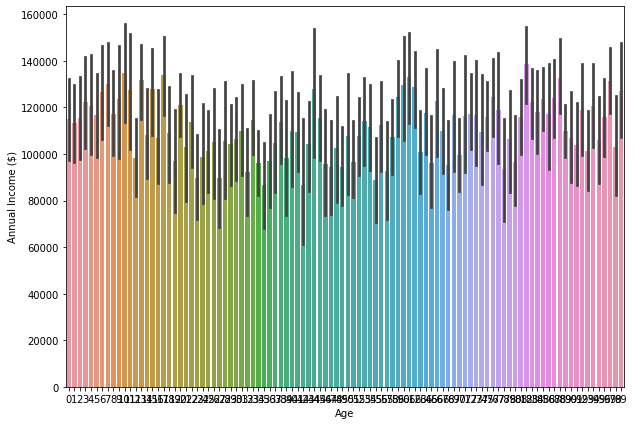

In [12]:
plt.figure(figsize=(10,7))
sns.barplot(x=df_customer["Age"],y=df_customer["Annual Income ($)"])

In [13]:
df_customer["Profession"].value_counts() # The customer profession & how much are under the each profession 


Artist           622
Healthcare       349
Entertainment    236
Engineer         182
Doctor           163
Executive        155
Lawyer           143
Marketing         88
Homemaker         62
Name: Profession, dtype: int64

<AxesSubplot:xlabel='Annual Income ($)', ylabel='Profession'>

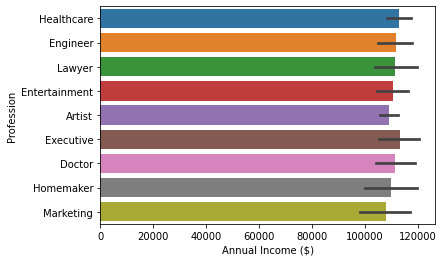

In [14]:
sns.barplot(y="Profession",x="Annual Income ($)",data=df_customer)

In [15]:
df1 = df_customer.select_dtypes("int") # The integer variables are stored in the df1 dataset


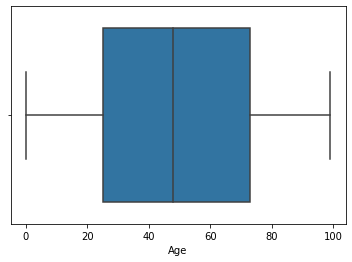

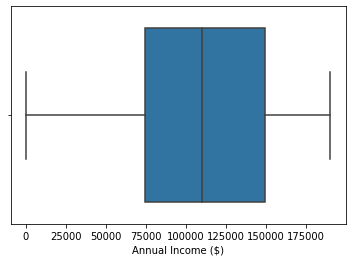

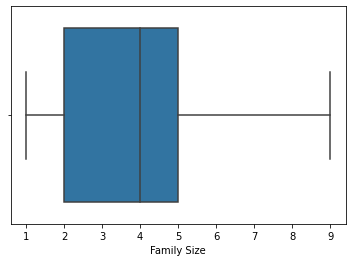

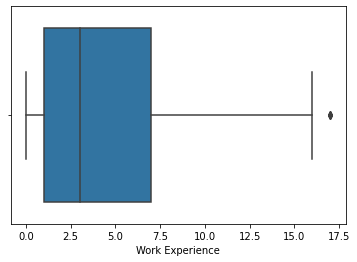

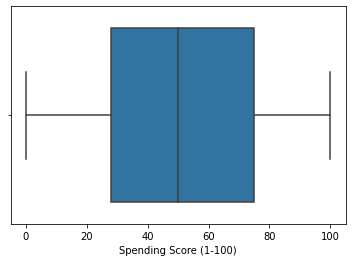

In [16]:
for i in df1.columns:
    #plt.subplot(1,1,1)
    sns.boxplot(df1[i])
    plt.show()  

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Profession'>

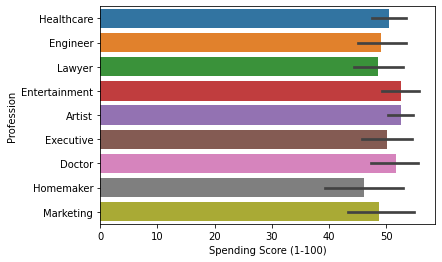

In [18]:
sns.barplot(y="Profession",x="Spending Score (1-100)",data=df_customer)

<AxesSubplot:xlabel='Work Experience', ylabel='Annual Income ($)'>

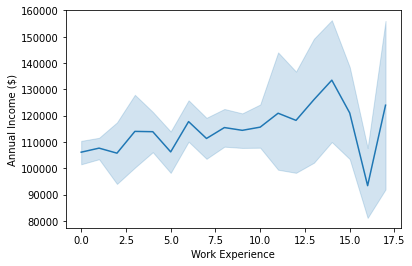

In [19]:
sns.lineplot(x="Work Experience",y="Annual Income ($)",data=df_customer)

In [21]:
df_customer.pivot_table(index="Spending Score (1-100)",columns="Profession") # The pivot table between the spending and profession

Age                                             \
Profession                 Artist Doctor   Engineer Entertainment  Executive   
Spending Score (1-100)                                                         
0                             NaN    NaN  52.500000           NaN        NaN   
1                       49.500000    1.0  86.000000     60.000000  23.333333   
2                       37.625000    NaN        NaN     48.000000        NaN   
3                       52.250000   53.0  64.000000     34.000000  32.000000   
4                       74.750000   87.0  75.500000     90.000000  69.500000   
...                           ...    ...        ...           ...        ...   
96                      48.500000   23.0        NaN     72.000000  19.000000   
97                      56.125000   37.0        NaN     15.500000  38.000000   
98                      51.428571    5.0  27.666667           NaN   3.000000   
99                      61.363636   83.0  39.000000     64.500000        NaN   
100                     39.333333    8.0        NaN     38.666667        NaN   

                                                                   \
Profession             Healthcare Homemaker     Lawyer  Marketing   
Spending Score (1-100)                                              
0                             NaN       NaN        NaN        NaN   
1                       37.000000       NaN  36.500000  70.500000   
2                       32.000000      26.0  53.000000        NaN   
3                       47.285714      70.5        NaN  40.666667   
4                       41.800000      54.0  66.500000  34.000000   
...                           ...       ...        ...        ...   
96                      69.800000      45.5        NaN  43.000000   
97                      56.666667       NaN        NaN  48.000000   
98                      21.000000       NaN  51.000000        NaN   
99                      40.666667       NaN  50.500000        NaN   
100                     78.666667      32.0  38.333333  54.000000   

                       Annual Income ($)  ... Family Size Work Experience  \
Profession                        Artist  ...   Marketing          Artist   
Spending Score (1-100)                    ...                               
0                                    NaN  ...         NaN             NaN   
1                           83291.500000  ...    4.000000        3.500000   
2                          100611.500000  ...         NaN        4.375000   
3                          163977.750000  ...    1.666667        4.250000   
4                           85873.375000  ...    6.000000        2.500000   
...                                  ...  ...         ...             ...   
96                         128407.300000  ...    5.333333        3.700000   
97                         114055.750000  ...    5.500000        4.625000   
98                         131617.714286  ...         NaN        6.142857   
99                         116991.545455  ...         NaN        4.636364   
100                        118239.333333  ...    3.000000        6.666667   

                                                                           \
Profession             Doctor Engineer Entertainment Executive Healthcare   
Spending Score (1-100)                                                      
0                         NaN      3.0           NaN       NaN        NaN   
1                        12.0      8.0          1.50  0.666667   0.500000   
2                         NaN      NaN          6.50       NaN   8.000000   
3                         1.0      0.0          9.00  7.000000   2.857143   
4                         5.5      6.5          1.00  6.000000   5.000000   
...                       ...      ...           ...       ...        ...   
96                        1.0      NaN          2.25  1.000000   1.800000   
97                        2.5      NaN          0.00  1.000000   4.000000   
98              

In [22]:
df1=df1[['Annual Income ($)','Spending Score (1-100)']]


from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_sc=sc.fit_transform(df1)
df_sc=pd.DataFrame(df_sc,columns=df1.columns)
df_sc.head()

,Annual Income ($),Spending Score (1-100)
0,-2.093501,-0.428339
1,-1.656133,1.075546
2,-0.540845,-1.609962
3,-1.131292,0.932319
4,-1.590528,-0.392532


In [23]:
from sklearn.cluster import KMeans

err=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(df_sc)
    err.append(km.inertia_)

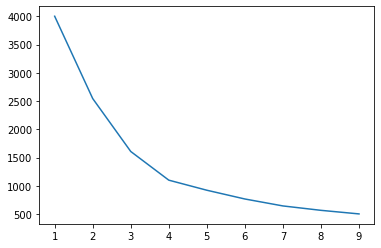

In [24]:
plt.plot(range(1,10),err)

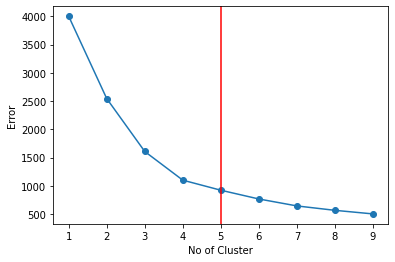

In [25]:
plt.plot(range(1,10),err, marker = 'o')
plt.xlabel('No of Cluster')
plt.ylabel('Error')
plt.axvline(5, c='r')
plt.show()

In [26]:
km=KMeans(n_clusters=5)
km.fit(df_sc)

KMeans(n_clusters=5)

In [27]:
km.labels_

array([4, 2, 1, ..., 1, 3, 4])

In [28]:
df1['label']=km.labels_
df1.head()
df1['label'].value_counts()

3    490
0    451
4    401
1    335
2    323
Name: label, dtype: int64

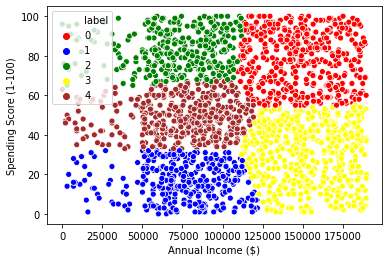

In [30]:
sns.scatterplot(x= df1['Annual Income ($)'],y= df1['Spending Score (1-100)'],hue=df1['label'],palette=['red','blue','green',
                                                                                           'yellow','brown'])
plt.show()